<ipython-input-1-af52cd950f2d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
<ipython-input-1-af52cd950f2d>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')
<ipython-input-1-af52cd950f2d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

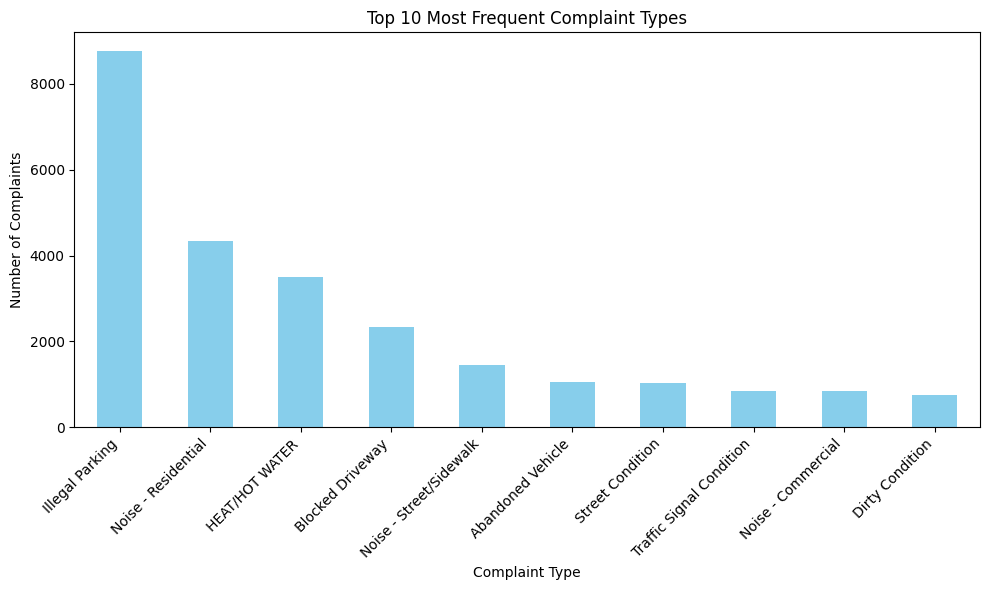

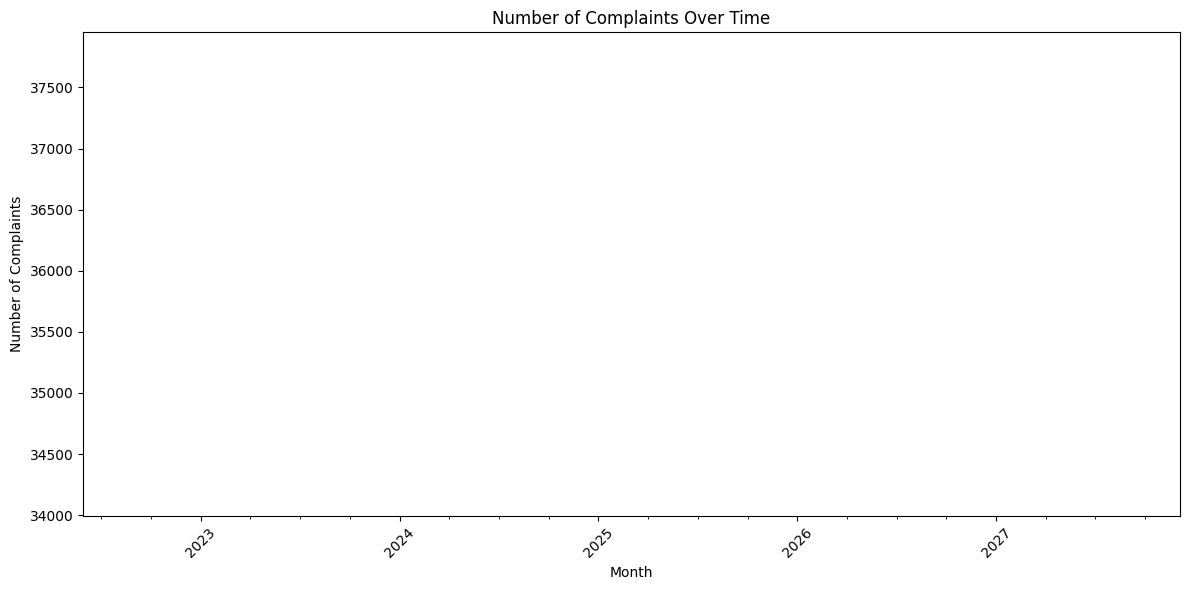

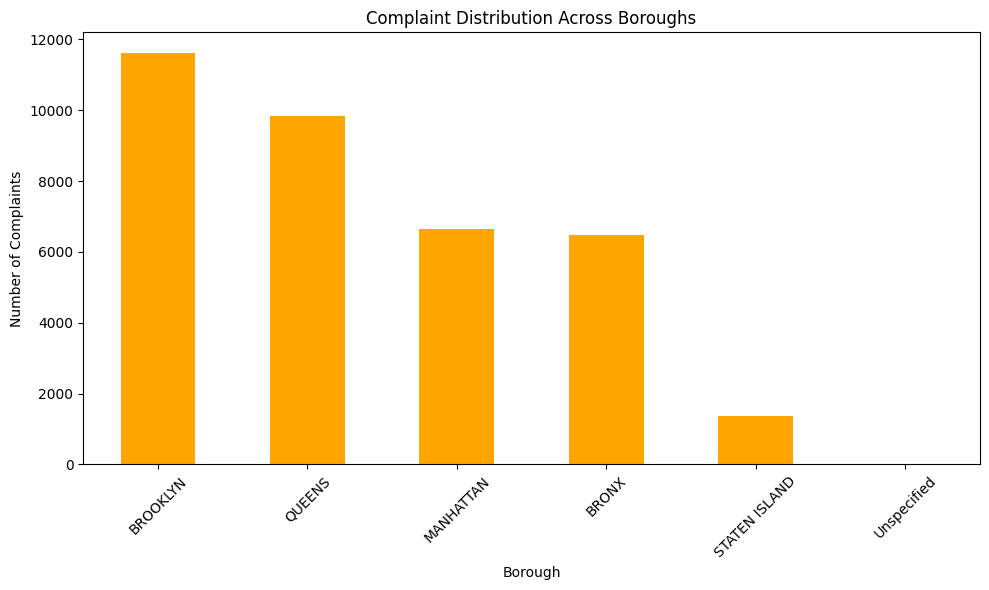

<Figure size 1500x800 with 0 Axes>

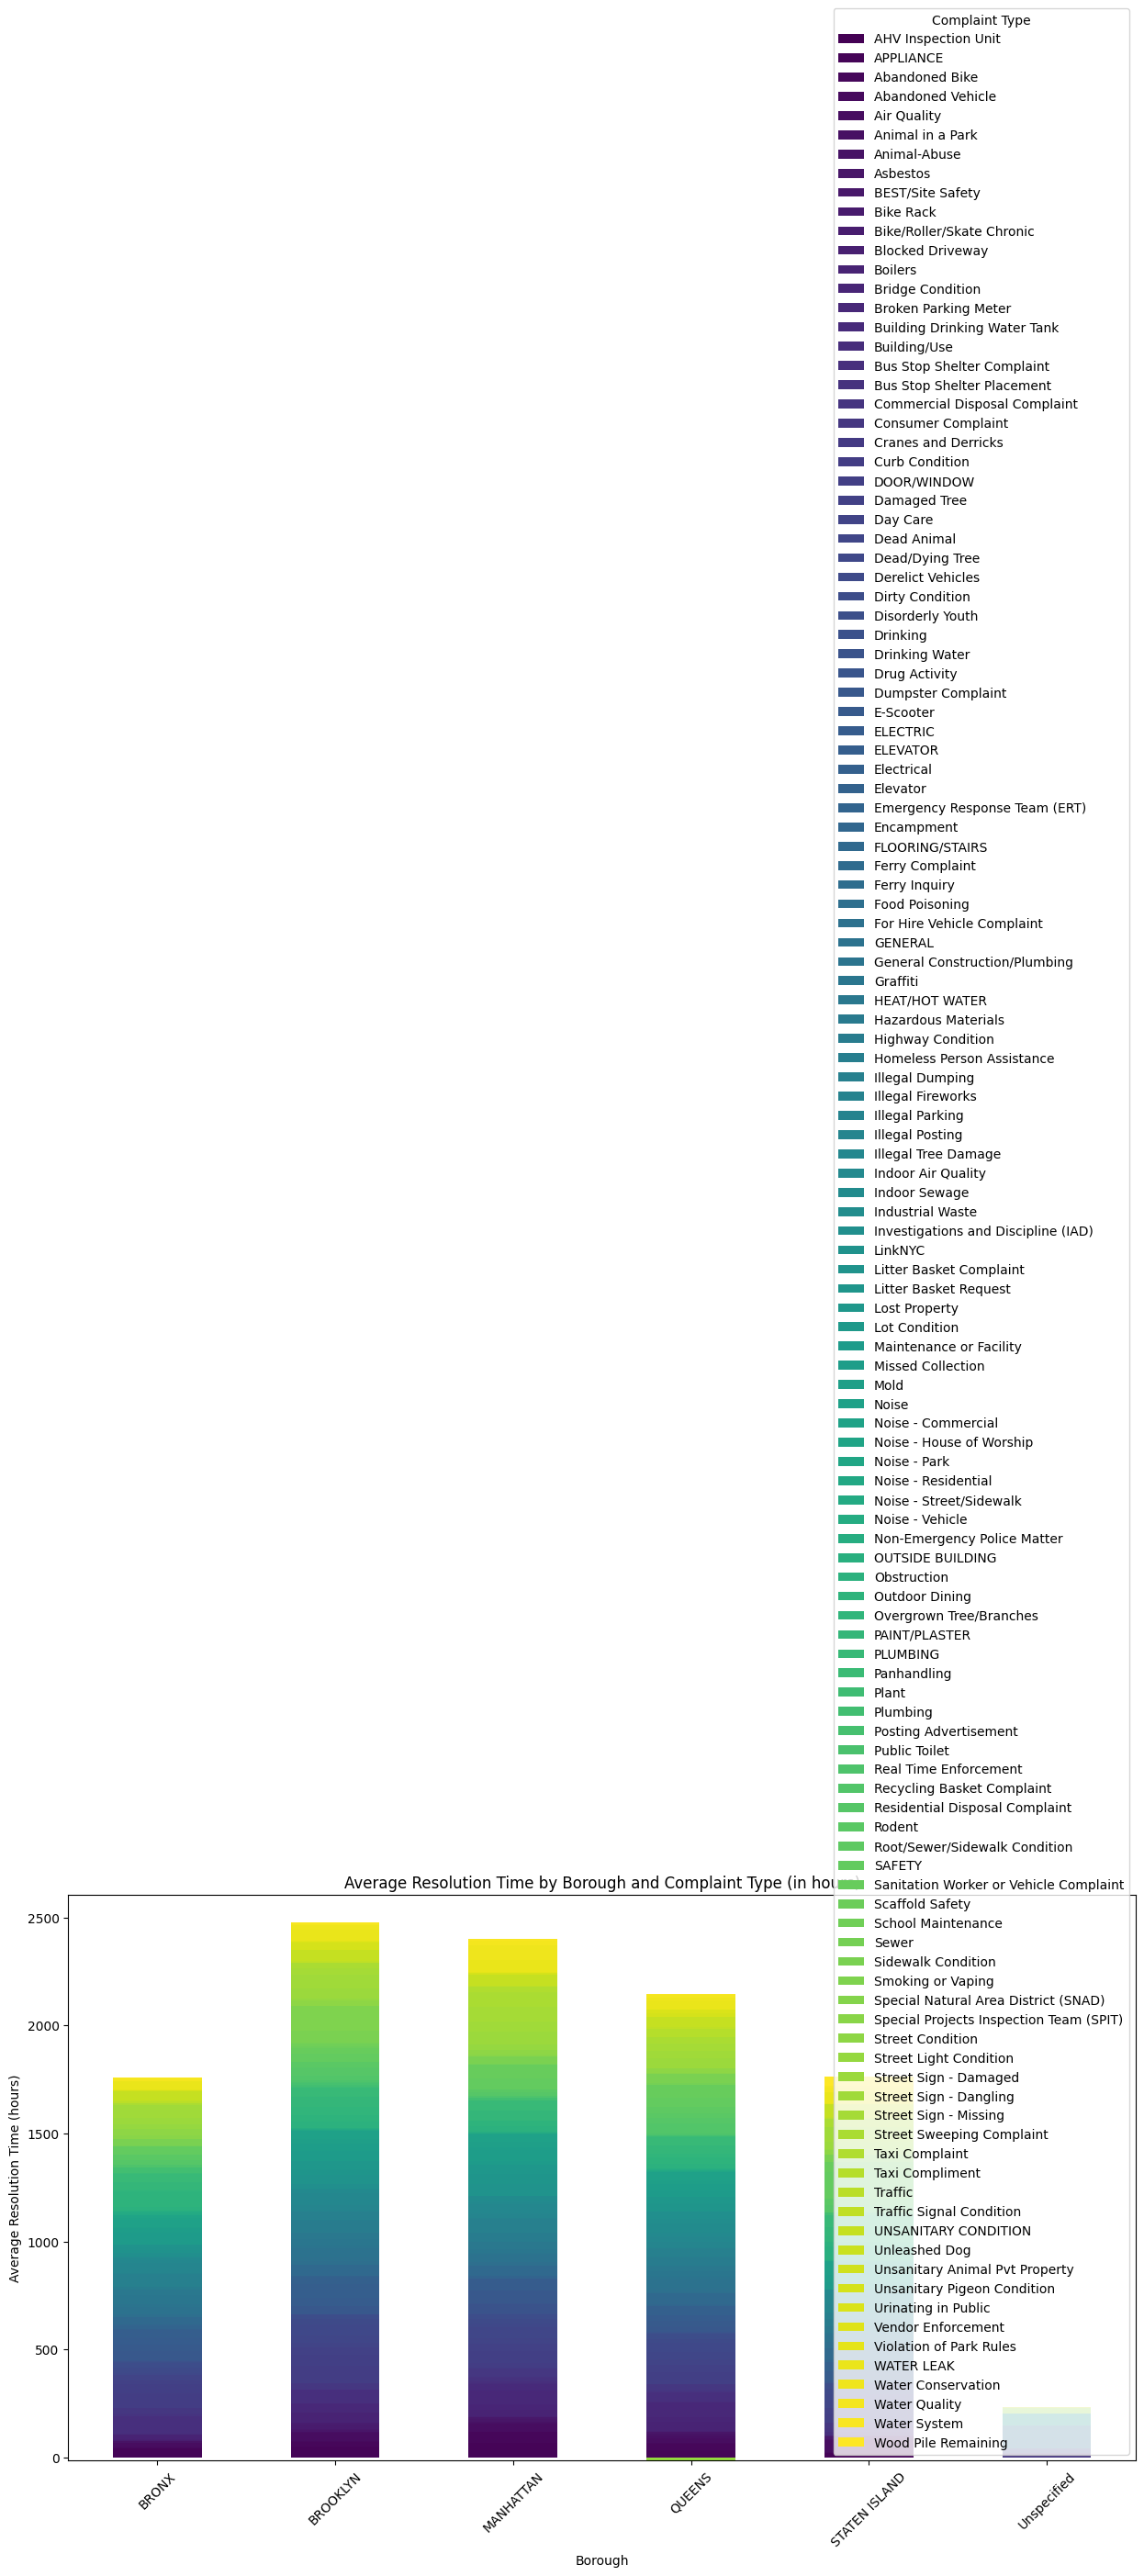

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

# Data Preprocessing
# Convert date columns to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')

# Handle missing values
df['Descriptor'].fillna('Unknown', inplace=True)
df['Location Type'].fillna('Unknown', inplace=True)
df['Incident Address'].fillna('Unknown', inplace=True)

# Drop rows with missing 'Closed Date'
df.dropna(subset=['Closed Date'], inplace=True)

# Handle duplicates
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis (EDA)

# Top 10 most frequent complaint types
complaint_counts = df['Complaint Type'].value_counts().head(10)

# Plot the top 10 most frequent complaint types
plt.figure(figsize=(10, 6))
complaint_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top_10_Complaints.png')

# Trend of complaints over time
df['Year-Month'] = df['Created Date'].dt.to_period('M')
complaints_by_month = df.groupby('Year-Month').size()

# Plot the trend of complaints over time
plt.figure(figsize=(12, 6))
complaints_by_month.plot(kind='line', color='green')
plt.title('Number of Complaints Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Trends_Over_Time.png')

# Complaint distribution across boroughs
borough_counts = df['Borough'].value_counts()

# Plot complaint distribution across boroughs
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='orange')
plt.title('Complaint Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Complaint_Distribution_Boroughs.png')

# Average resolution time by borough and complaint type
df['Resolution Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600  # in hours
avg_resolution_time = df.groupby(['Borough', 'Complaint Type'])['Resolution Time'].mean().unstack()

# Plot the average resolution time by borough and complaint type
plt.figure(figsize=(15, 8))
avg_resolution_time.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='viridis')
plt.title('Average Resolution Time by Borough and Complaint Type (in hours)')
plt.xlabel('Borough')
plt.ylabel('Average Resolution Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Resolution_Time_Borough_Complaint.png')

# Save the processed DataFrame
df.to_csv('processed_311_data.csv', index=False)


<ipython-input-8-e71949bfbe9d>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
<ipython-input-8-e71949bfbe9d>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')
<ipython-input-8-e71949bfbe9d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

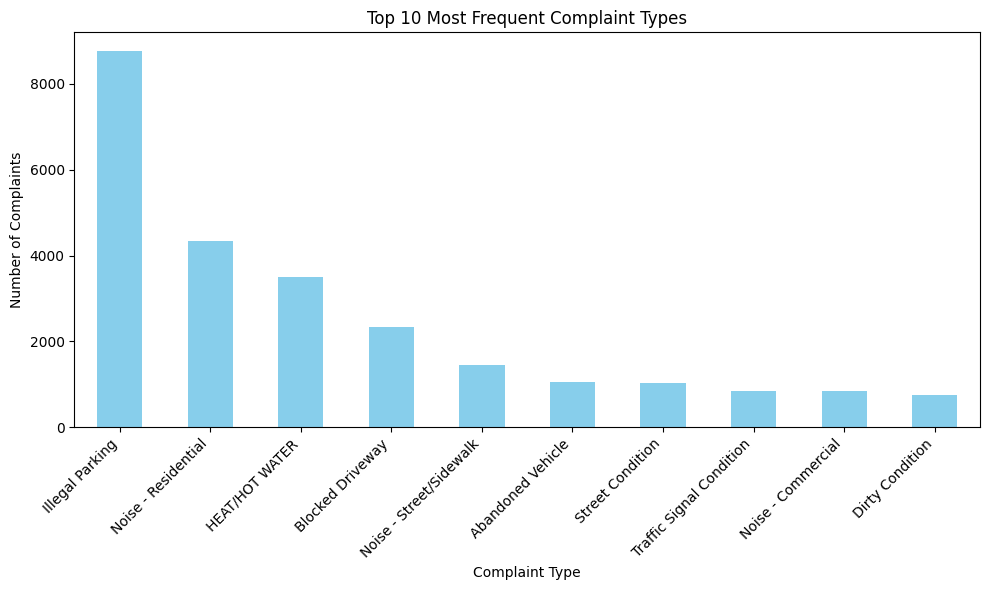

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


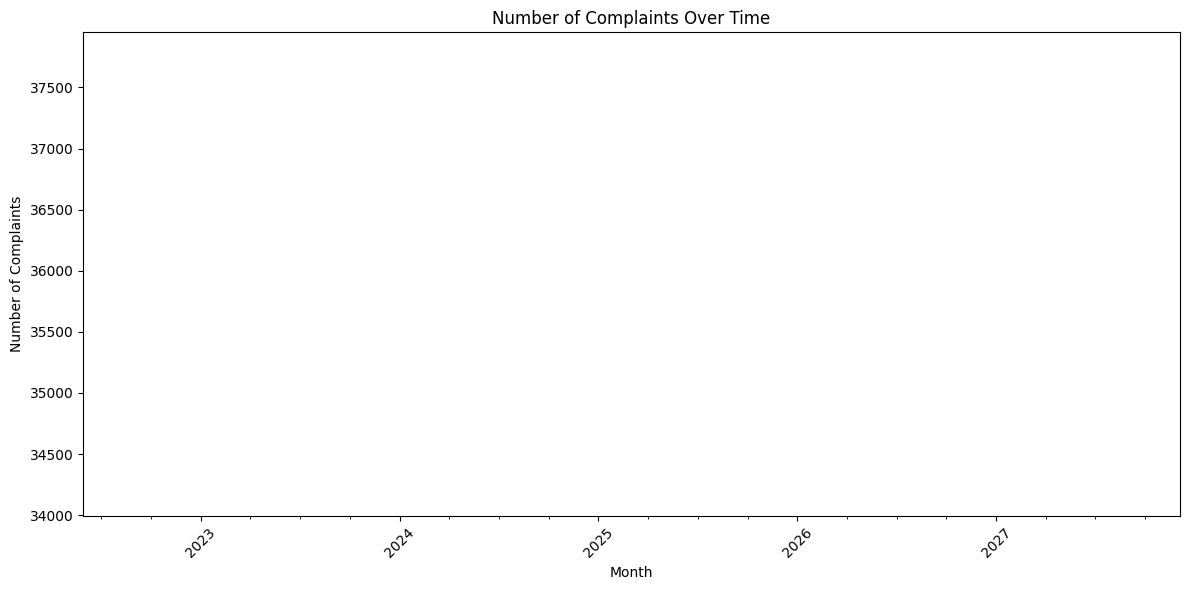

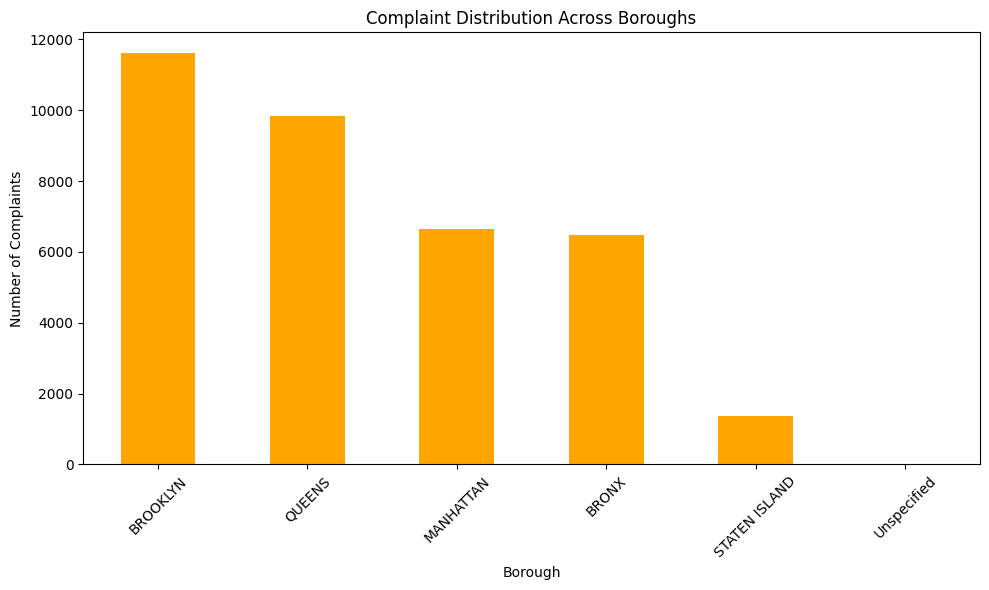

<ipython-input-8-e71949bfbe9d>:86: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

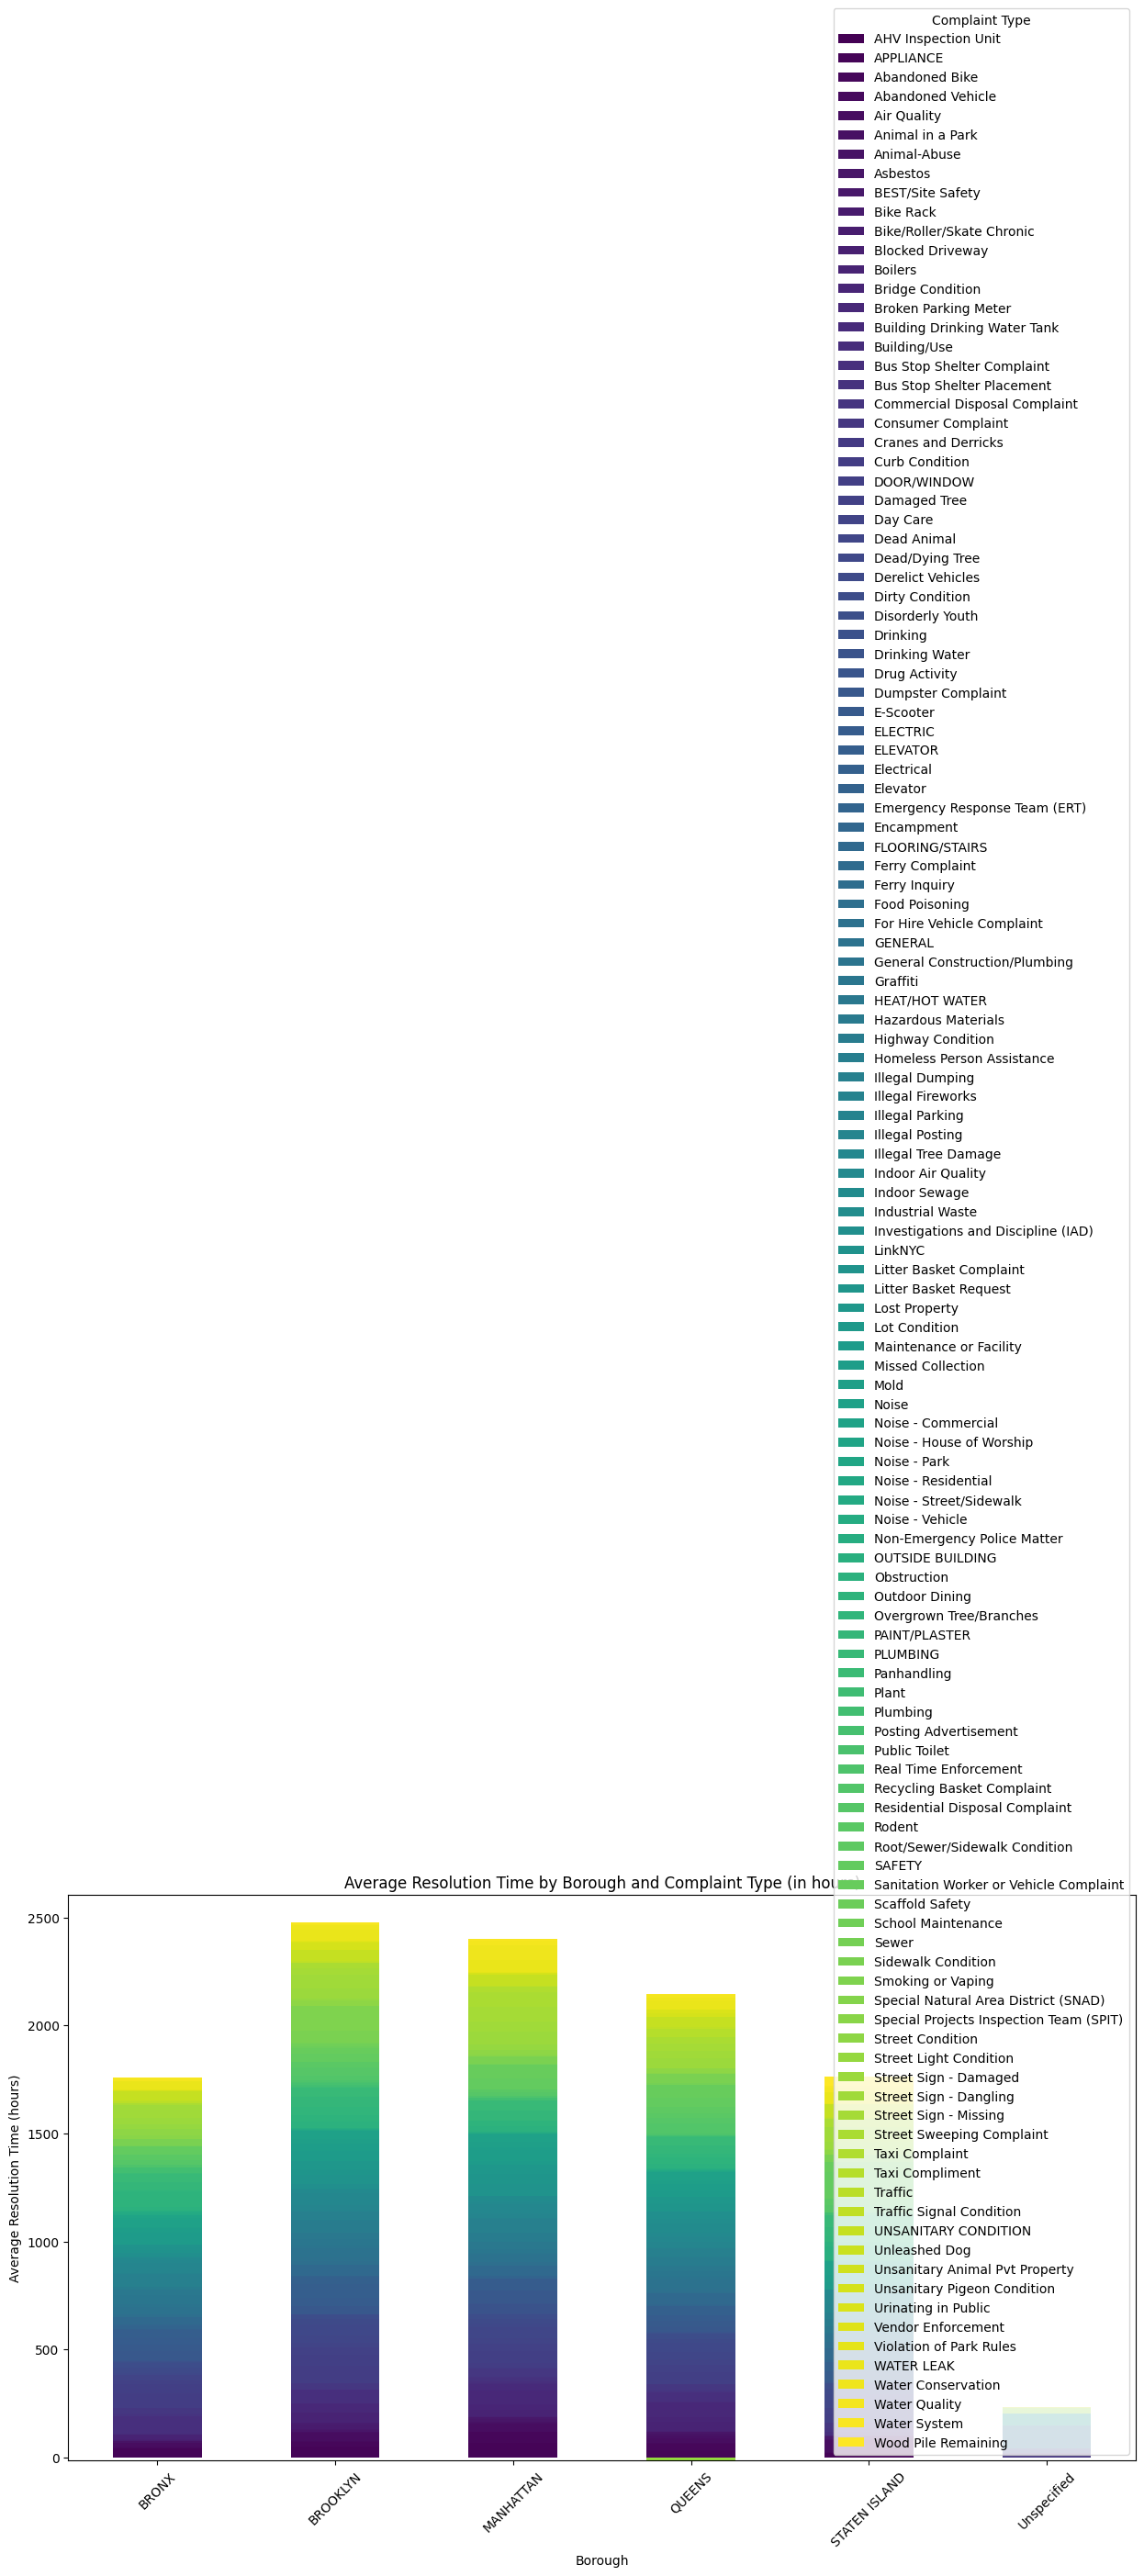

Accuracy: 0.21042390548992357
Classification Report:
                                          precision    recall  f1-score   support

                    AHV Inspection Unit       0.00      0.00      0.00         0
                              APPLIANCE       0.00      0.00      0.00        12
                         Abandoned Bike       0.00      0.00      0.00         4
                      Abandoned Vehicle       0.05      0.05      0.05       187
                            Air Quality       0.50      0.26      0.34        23
                       Animal in a Park       0.00      0.00      0.00        17
                           Animal-Abuse       0.00      0.00      0.00        19
                               Asbestos       0.00      0.00      0.00         0
                       BEST/Site Safety       0.00      0.00      0.00         1
                              Bike Rack       0.00      0.00      0.00         0
              Bike/Roller/Skate Chronic       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

Mean Absolute Error: 7.104892526786736
Mean Squared Error: 155.70724756816963


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

# Data Preprocessing
# Convert 'Created Date' and 'Closed Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')

# Handle missing values by filling with 'Unknown' or dropping
df['Descriptor'].fillna('Unknown', inplace=True)
df['Location Type'].fillna('Unknown', inplace=True)
df['Incident Address'].fillna('Unknown', inplace=True)

# Drop rows with missing 'Closed Date' and handle duplicates
df.dropna(subset=['Closed Date'], inplace=True)
df.drop_duplicates(inplace=True)

# Feature Engineering: Convert 'Year-Month' to numeric (e.g., Year * 12 + Month)
df['Year'] = df['Created Date'].dt.year
df['Month'] = df['Created Date'].dt.month

# Exploratory Data Analysis (EDA)

# Top 10 most frequent complaint types
complaint_counts = df['Complaint Type'].value_counts().head(10)

# Plot the top 10 most frequent complaint types
plt.figure(figsize=(10, 6))
complaint_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top_10_Complaints.png')
plt.show()

# Trend of complaints over time
df['Year-Month'] = df['Created Date'].dt.to_period('M')
complaints_by_month = df.groupby('Year-Month').size()

# Plot the trend of complaints over time
plt.figure(figsize=(12, 6))
complaints_by_month.plot(kind='line', color='green')
plt.title('Number of Complaints Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Trends_Over_Time.png')
plt.show()

# Complaint distribution across boroughs
borough_counts = df['Borough'].value_counts()

# Plot complaint distribution across boroughs
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='orange')
plt.title('Complaint Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Complaint_Distribution_Boroughs.png')
plt.show()

# Average resolution time by borough and complaint type
df['Resolution Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600  # in hours
avg_resolution_time = df.groupby(['Borough', 'Complaint Type'])['Resolution Time'].mean().unstack()

# Plot the average resolution time by borough and complaint type
plt.figure(figsize=(15, 8))
avg_resolution_time.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='viridis')
plt.title('Average Resolution Time by Borough and Complaint Type (in hours)')
plt.xlabel('Borough')
plt.ylabel('Average Resolution Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Resolution_Time_Borough_Complaint.png')
plt.show()

# Machine Learning: Predict Complaint Type (Classification)

# Select features (X) and target (y)
X = df[['Borough', 'Resolution Time', 'Year', 'Month']]  # Features
y = df['Complaint Type']  # Target variable (Complaint Type)

# Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(X)

# Encode the target variable (Complaint Type)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert complaint type labels to integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Ensure consistent class labels (align y_test and y_pred)
classes = label_encoder.classes_

# Evaluate the classifier model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the Classification Report with proper alignment of classes
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=classes, labels=range(len(classes))))

# Machine Learning: Predict Resolution Time (Regression)

# Select features (X) and target (y) for regression
X_reg = df[['Borough', 'Complaint Type', 'Year', 'Month']]  # Features (add more features if needed)
y_reg = df['Resolution Time']  # Target variable (Resolution Time)

# Convert categorical variables to numerical using One-Hot Encoding
X_reg = pd.get_dummies(X_reg)

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = rf_regressor.predict(X_test_reg)

# Evaluate the regressor model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Save the processed DataFrame
df.to_csv('processed_311_data.csv', index=False)
